In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('../../datasets/model.csv', index_col = [0])

### Explain each variable choice

In [3]:
X = df[['ydstogo', 'run', 'td_prob', 'goal_to_go']]
y = df['4th_down_conversion']

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 329 to 449368
Data columns (total 4 columns):
ydstogo       4776 non-null int64
run           4776 non-null int64
td_prob       4776 non-null float64
goal_to_go    4776 non-null float64
dtypes: float64(2), int64(2)
memory usage: 186.6 KB


In [5]:
df['goal_to_go'].value_counts()

0.0    4286
1.0     490
Name: goal_to_go, dtype: int64

# Confusion Matrices and ROCs of Logistic Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
log = LogisticRegression()

In [8]:
log.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
log.score(X_train, y_train)

0.6217197096594081

In [10]:
log.score(X_test, y_test)

0.6532663316582915

In [11]:
log.coef_

array([[-0.10148679,  0.41490075,  1.58040654, -0.62648846]])

In [12]:
log.intercept_

array([0.09971492])

# Gridsearch paramaters

In [13]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
log_params = {
    'penalty': ['l1', 'l2'],
    'C': [1.6, 1.8, 2]
}

gs = GridSearchCV(log, param_grid=log_params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

0.621998883305416


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 2, 'penalty': 'l1'}

In [15]:
gs.score(X_train, y_train)

0.6217197096594081

In [16]:
gs.score(X_test, y_test)

0.6557788944723618

In [34]:
# ydstogo, run, td prob, goal_to go

In [17]:
gs.best_estimator_.coef_

array([[-0.09886907,  0.40616953,  1.87597832, -0.64651647]])

In [18]:
gs.best_estimator_.intercept_

array([0.04468077])

### Check specificity, sensitivity and accuracy

In [19]:
preds = gs.predict(X_test)

In [20]:
confusion_matrix(y_test, preds)  

array([[390, 248],
       [163, 393]])

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [22]:
# What is the specificity of our test set?

spec = tn / (tn + fp)

# sPecificity = TN / all negatives = TN / (TN + FP)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.6113


In [23]:
# What is the sensitivity of our test set?

sens = tp / (tp + fn)

# seNsitivity = TP / all positives = TP / (TP + FN)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.7068


In [24]:
# What is the accuracy of our test set?
acc = (tp + tn) / (tp + tn + fp + fn)

print(f'Accuracy: {round(acc,4)}')

Accuracy: 0.6558


In [25]:
pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [26]:
pred_df.head()

,true_values,pred_probs
2724,1.0,0.241824
44543,1.0,0.667590
257237,1.0,0.502769
300830,0.0,0.572805
376804,1.0,0.573933


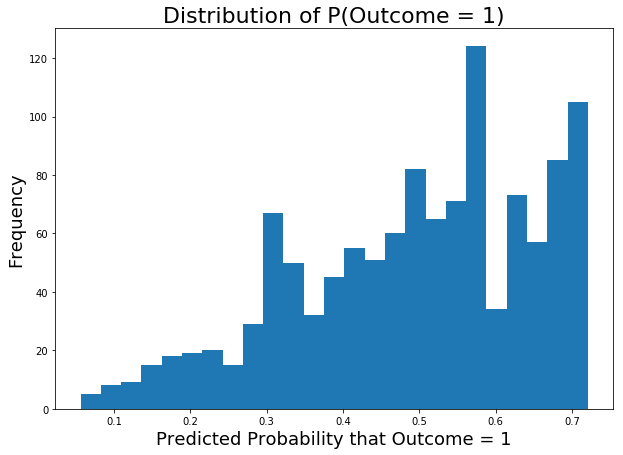

In [27]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.savefig('../../images/logistic/distribution_1.png');

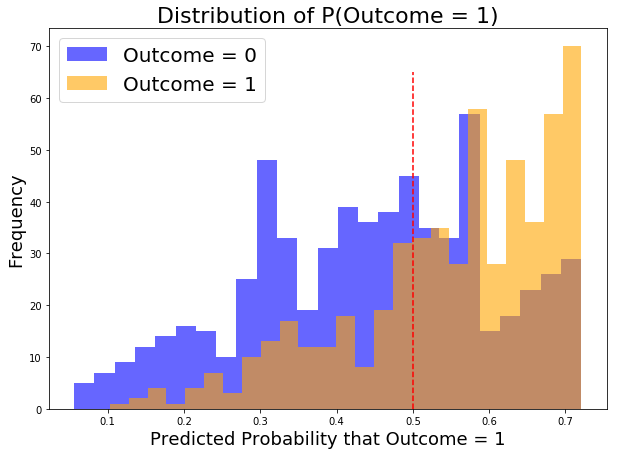

In [28]:

# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20)
plt.savefig('../../images/logistic/distribution_2.png')

In [29]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.7026242642249837

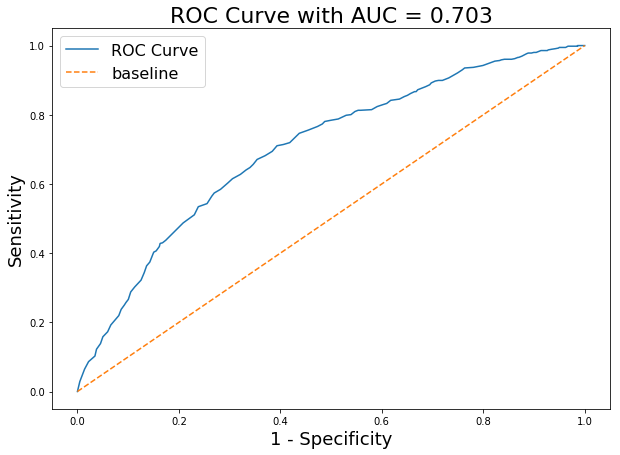

In [30]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16)
plt.savefig('../../images/logistic/roc.png')